Exploration of an alternative method of determining the smallest allowable size to split open field sessions into while retaining behavioural characteristics. Was not used in thesis because of strange results not conducive to splitting task, would need more research.

In [6]:
%matplotlib inline
%pylab inline
import datetime, pickle
import numpy as np
import pandas as pd
import statsmodels.stats.weightstats

import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib

/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'std', 'mean', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
d = pickle.load(open("split_data.p", "rb"))
len(d[30]['GaussianNB'])

10

In [8]:
classifiers = list(d[list(d.keys())[0]].keys())
segment_sizes = list(d.keys())

mean_scores = []
std_scores = []
for clf in classifiers:
    #scores.append([])
    mean_scores.append([])
    std_scores.append([])
    for i in segment_sizes:
        mean_scores[-1].append(np.array(d[i][clf]).mean())
        std_scores[-1].append(np.array(d[i][clf]).std())

p_values = []
for clf in classifiers:
    p_values.append([])
    for i in segment_sizes:
        d1 = statsmodels.stats.weightstats.DescrStatsW(np.hstack(d[max(segment_sizes)][clf]))
        d2 = statsmodels.stats.weightstats.DescrStatsW(np.hstack(d[i][clf]))
        t,p = statsmodels.stats.weightstats.CompareMeans(d1,d2).ztest_ind(usevar='unequal')
        p_values[-1].append(p)
        
time = [datetime.timedelta(minutes=i) for i in segment_sizes]

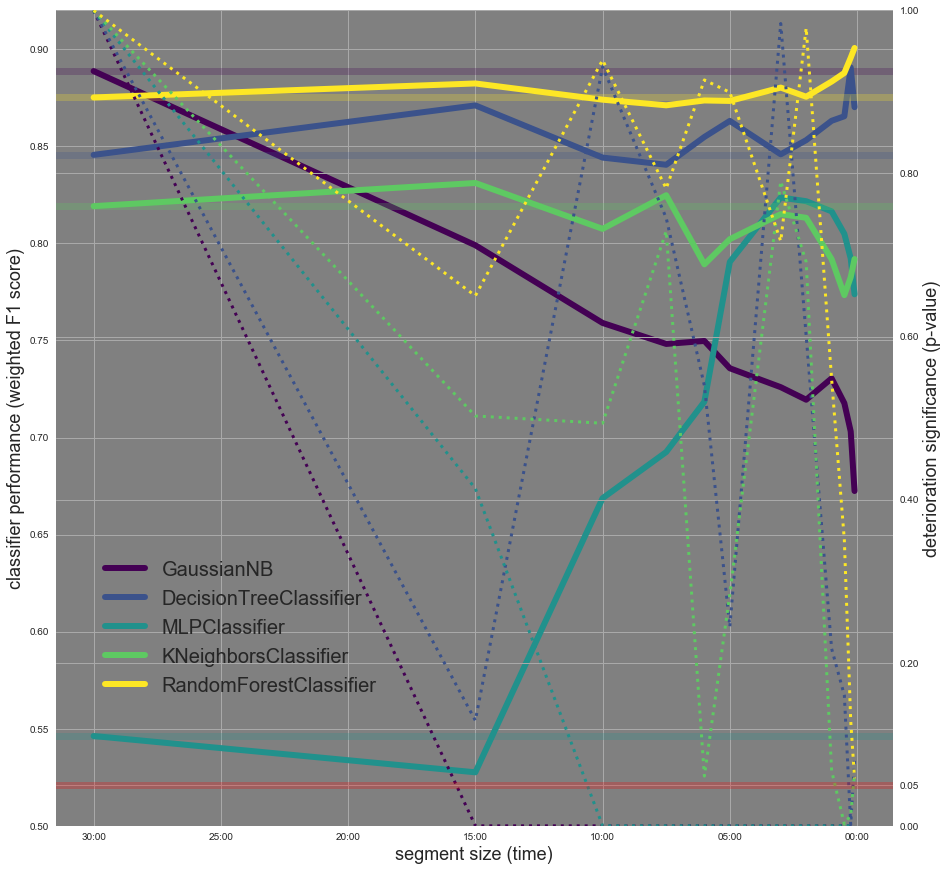

In [14]:
pylab.rcParams['figure.figsize'] = (15, 15)

cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(mean_scores)-1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.yaxis.grid(color='white', linestyle='dashed')
ax2.yaxis.grid(color='white', linestyle='dashed')
ax1.grid(b=True, which='both', color='darkgray',linestyle='-')
ax2.grid(b=True, which='both', color='darkgray',linestyle='-')

ax1.set_facecolor('gray')

for i,mean,std,p in zip(range(len(mean_scores)),mean_scores,std_scores,p_values):
    color = cmap(norm(i))
    #ax1.errorbar(segment_sizes,mean,yerr=std,color=color,linewidth=5)
    l = ax1.plot(segment_sizes,mean,color=color,linewidth=6,label=classifiers[i])
    ax1.axhline(y=mean[0], color=color, linestyle='-', alpha=0.25, linewidth=7)
    ax2.plot(segment_sizes,p,color=color,linestyle='dotted',linewidth=3)
    
plt.gca().invert_xaxis()
def timeTicks(x, pos):                                                                                                                                                                                                                                                         
    d = datetime.timedelta(minutes=x)                                                                                                                                                                                                                                          
    return ':'.join(str(d).split(':')[1:])
formatter = matplotlib.ticker.FuncFormatter(timeTicks)                                                                                                                                                                                                                         
ax1.xaxis.set_major_formatter(formatter)

ax1.set_xlabel('segment size (time)', fontsize=18)
ax1.set_ylabel('classifier performance (weighted F1 score)', fontsize=18)
ax2.set_ylabel('deterioration significance (p-value)', fontsize=18)
ax2.set_ylim((0,1))

ax2.axhline(y=0.05, color='r', linestyle='-', alpha=0.25, linewidth=7)
#ax1.text(0.4,0.055,'p = 0.05',size=18)
ax2.set_yticks(list(ax2.get_yticks()) + [0.05])
ax1.set_ylim((0.5,0.92))

ax1.legend(loc=(0.05,0.15),prop={'size':20})

In [502]:
mean_scores[3][-6]

0.81633704477256541

In [500]:
segment_sizes[-6]

3